In [1]:
import numpy as np
import torchvision.transforms.functional as F
from matplotlib import pyplot as plt
from torchvision.io import read_image

%load_ext autoreload
%autoreload 2

from gaussian import Gaussian2D
%matplotlib ipympl

In [116]:
def res_to_scale(res, factor=0.3):
    return factor / res

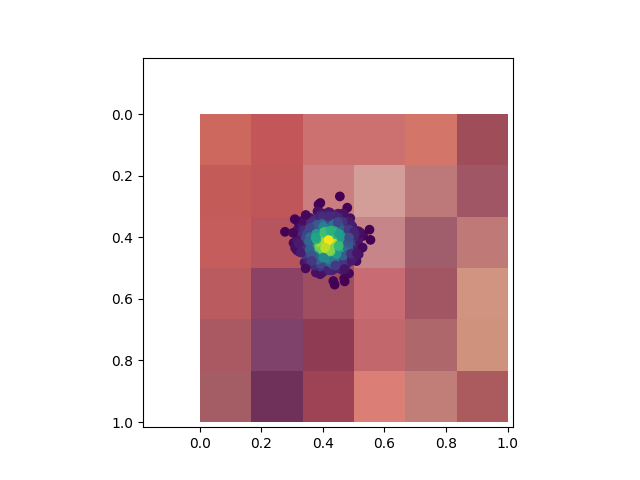

In [165]:
im = read_image('../data/lena.png')
res = 6
shrunk = F.resize(im, res, antialias=True)

mu = np.array([0.5, 0.5])
pix_len = 1 / res
shift = pix_len / 2
mu -= np.array([shift, shift])

scale = res_to_scale(res, factor=0.25)

g = Gaussian2D(0, np.array([scale, scale]), mu)

N_points = 1000
# sample points
samples = g.scipy_gaussian().rvs(size=N_points)
samples_pdf = g.scipy_gaussian().pdf(samples)

plt.cla()

plt.scatter(x=mu[0], y=mu[1])
plt.scatter(x=samples[:, 0], y=samples[:, 1], c=samples_pdf)
plt.imshow(shrunk.permute(1, 2, 0), extent=[0, 1, 1, 0])

width = 0.6
# width = 2*pix_len

lo = mu[0] - width
hi = mu[0] + width

plt.xlim(lo, hi)
plt.ylim(hi, lo)
plt.show()

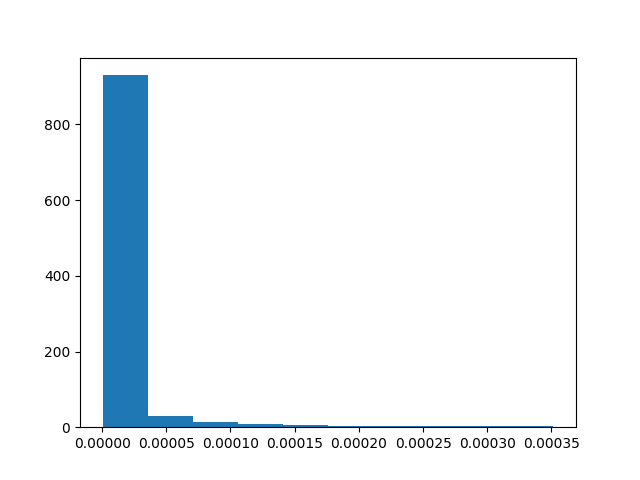

In [182]:


n_points = 1000
resolutions = np.linspace(16, 512, n_points)
scales = [res_to_scale(res) for res in resolutions]
gaussians = [Gaussian2D(0, np.array([scale, scale]), np.array([0, 0])) for scale in scales]

g_diagonals = [np.diag(g.covariance_matrix())[0] for g in gaussians]

plt.clf()
plt.cla()
# plt.hist(scales)
plt.hist(g_diagonals)
plt.show()